<a href="https://colab.research.google.com/github/bojkovskidamjan/VNP_PROJECT/blob/master/Project_VNP_203236.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cluster Label Counts: The code will print the number of documents assigned to each cluster. This information helps you understand the distribution of documents across different clusters.

Cluster Interpretation: For each cluster, the code will print the cluster label, followed by the articles within that cluster. It will then identify the dominant topics within the cluster and print their counts. You can interpret the dominant topics to gain insights into the main themes present in each cluster.

Emerging Sectors: Assuming the first two dominant topics represent emerging sectors, the code will identify and print the emerging sectors within each cluster. This helps you identify the specific topics that are emerging or gaining importance within each cluster.

Cluster Visualization: The code will generate a bar plot that visualizes the number of documents per cluster. This provides a visual representation of the cluster distribution in the dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Streaming output truncated to the last 5000 lines.
A U.S. military convoy of at least 40 armored vehicles was seen moving toward Fallujah, while British troops in southern Iraq headed north to plug any gaps that an offensive on the city might create.
----------------------
The family of a British hostage captured in Iraq has appealed to the British Prime Minister, Tony Blair, to intervene to try to save his life.
----------------------
 LONDON (Reuters) - The dollar eased toward last week's  record low against the euro on Thursday after capital inflows  data added to worries the United States may struggle to fund  its current account deficit.
----------------------
 BAGHDAD (Reuters) - An Iranian diplomat taken hostage in  Iraq last month has been released by his captors but the fate  of at least 11 other foreigners, including a Briton threatened  with beheading, remained unclear on Tuesday.
----------------------
Reuters - Millions of locusts swarmed through\Israel's Red Sea resort to

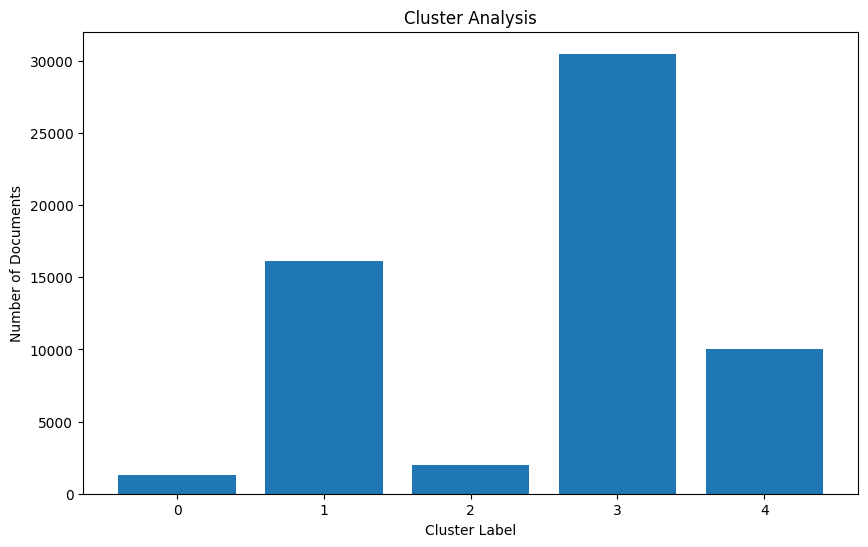

In [12]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('train.csv')

# Shrink the dataset by randomly sampling a subset
shrink_ratio = 0.5  # Adjust this ratio as needed
df = df.sample(frac=shrink_ratio, random_state=42)

# Preprocess the text data
stop_words = set(stopwords.words('english'))

# Function to tokenize and remove stopwords
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Apply preprocessing to the dataset
df['tokens'] = df['Description'].apply(preprocess_text)

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['tokens'])

# Convert the dictionary to a bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]

# Apply the LDA model
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=5, passes=10)

# Get the dominant topic for each document
df['dominant_topic'] = df['tokens'].apply(lambda x: lda_model.get_document_topics(dictionary.doc2bow(x))[-1][0])

# Define the topic labels based on your interpretation of the topics
topic_labels = {
    0: 'Emerging Sectors',
    1: 'Market Influencers',
    2: 'Economic Indicators',
    3: 'Topic 3',
    4: 'Topic 4'
}

# Assign topic labels to each document
df['topic_label'] = df['dominant_topic'].map(topic_labels)

# Perform cluster analysis on the documents
num_clusters = len(topic_labels)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Description'])
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels to each document
df['cluster_label'] = kmeans.labels_

# Count the number of documents per cluster
cluster_label_counts = df['cluster_label'].value_counts()

# Print the cluster label counts
print(cluster_label_counts)

# Cluster interpretation
for cluster_label in range(num_clusters):
    print(f"Cluster Label: {cluster_label}")
    cluster_articles = df[df['cluster_label'] == cluster_label]['Description']
    print("Cluster Articles:")
    for article in cluster_articles:
        print(article)
        print("----------------------")

    # Identify the dominant topics within the cluster
    dominant_topics = df[df['cluster_label'] == cluster_label]['dominant_topic'].value_counts()
    print("Dominant Topics:")
    for topic, count in dominant_topics.items():
        topic_label = topic_labels[topic]
        print(f"Topic: {topic_label}, Count: {count}")
    
    # Identify emerging sectors within the cluster
    emerging_sectors = dominant_topics[0:2]  # Assuming the first two dominant topics represent emerging sectors
    print("Emerging Sectors:")
    for topic, count in emerging_sectors.items():
        topic_label = topic_labels[topic]
        print(f"Sector: {topic_label}, Count: {count}")
    
    print("======================")

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.bar(cluster_label_counts.index, cluster_label_counts.values)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Documents')
plt.title('Cluster Analysis')
plt.show()